# Heart Attack Risk Analysis
### Exploring Key Factors Affecting Mortality in Heart Failure Patients
#### By Nicholas Hausler
#### September 09, 2025


[Kaggle Heart Attack Dataset](https://www.kaggle.com/datasets/durgeshrao9993/heart-attack-analysis-data/data)


# ASK: What drives mortality risk in heart failure patients?

The purpose of this analysis is to understand which patient characteristics and clinical measurements are
most strongly associated with mortality in heart failure. By identifying these factors, we can provide insights that support 
**early intervention** and **risk management**.

---

## Features and Their Relevance to Cardiac Health

### Demographics & Lifestyle
- **Age**  
  Older patients are more likely to experience cardiac complications due to natural decline in heart function, vascular stiffness, and accumulated comorbidities.

- **Sex**  
  Biological differences can influence risk factors and outcomes in heart failure (e.g., hormonal protection in pre-menopausal women, differences in treatment response).

- **Smoking**  
  Smoking damages blood vessels, raises blood pressure, increases oxidative stress, and is a strong independent risk factor for cardiovascular disease.

---

### Clinical Measurements
- **Ejection Fraction (EF)**  
  EF measures how much blood the left ventricle pumps out with each contraction. Low EF indicates poor heart function and is one of the strongest predictors of mortality.

- **Serum Creatinine**  
  Elevated creatinine signals impaired kidney function, which often coexists with heart failure. Poor kidney clearance stresses the heart and worsens outcomes.

- **Serum Sodium**  
  Low sodium (hyponatremia) is a marker of fluid imbalance and severe heart failure. Sodium levels provide a strong prognostic indicator for mortality.

- **Platelets**  
  Platelets affect clotting. Abnormally low or high levels can reflect inflammation, bleeding risk, or vascular damage—all relevant to cardiac outcomes.

- **Creatinine Phosphokinase (CPK)**  
  High CPK is a marker of muscle damage, including cardiac muscle injury after a heart attack. Persistent elevation suggests worse outcomes.

- **Blood Pressure (High_BP)**  
  Chronic hypertension thickens the heart muscle, damages arteries, and accelerates heart failure progression.

---

### Comorbidities
- **Diabetes**  
  Damages blood vessels, raises blood pressure, and accelerates atherosclerosis. Increases heart failure risk significantly.

- **Anaemia**  
  Reduces oxygen delivery to tissues. In heart failure patients, anaemia worsens fatigue, exercise intolerance, and mortality risk.

---

### Target Variable
- **Death Event (Mortality)**  
  Binary outcome indicating whether the patient survived or died during the follow-up period. This is the variable we aim to understand and predict.

---

# Heart Attack Risk Analysis: Feature Summary

| Feature | Definition / Description | Key Details / Impact on Cardiac Health |
|---------|-------------------------|---------------------------------------|
| **Age** | The age of the patient | Older patients have higher risk due to natural decline in heart function and comorbidities. |
| **Sex** | Biological sex of the patient | Influences risk and treatment outcomes in heart failure. |
| **Anemia** | Condition characterized by insufficient healthy red blood cells or hemoglobin | Symptoms: fatigue, weakness, shortness of breath. Causes: nutritional deficiencies (iron, B12), chronic diseases, genetic disorders. Worsens oxygen delivery to tissues, increasing mortality risk. |
| **Creatine Phosphokinase (CPK)** | Enzyme involved in energy transfer in muscle cells | Isoenzymes: CK-MM (skeletal), CK-MB (heart), CK-BB (brain/smooth). Measured via blood test. Elevated levels indicate myocardial infarction, rhabdomyolysis, muscular dystrophy, or acute kidney injury. |
| **Diabetes** | Group of diseases affecting blood sugar regulation | Type 1: no insulin production. Type 2: insulin resistance. Symptoms: increased thirst, frequent urination, fatigue, blurred vision. Untreated can lead to heart disease, kidney damage, nerve damage. |
| **Ejection Fraction (EF)** | % of blood the heart pumps out with each contraction | Normal: 55-70%. Low EF indicates heart failure. Critical for treatment guidance. |
| **High Blood Pressure (High_BP)** | Consistently elevated force of blood on artery walls | Measured in mmHg (Systolic / Diastolic). ≥140/90 considered high. Increases risk of heart failure and vascular damage. |
| **Platelets** | Small blood components aiding clot formation | Normal: 150k-400k/µL. Low: risk of bleeding. High: risk of dangerous blood clots and vascular blockage. |
| **Serum Creatinine** | Byproduct of creatine, reflects kidney function | Normal: Men 0.9-1.3 mg/dL, Women 0.6-1.1 mg/dL. High: impaired kidney function. Low: rare, may indicate low muscle mass. |
| **Serum Sodium** | Vital electrolyte for fluid balance and nerve/muscle function | Normal: 135-145. High (>140) increases risk of hypertension (+29%) and heart failure (+20%). Maintaining lower-normal levels is beneficial. |
| **Smoking** | History of tobacco use | Damages vessels, increases oxidative stress, raises blood pressure, strong independent cardiac risk factor. |
| **Death** | Outcome variable | Indicates if patient survived or died. Target variable for analysis. |


## Sample Dataset Preview

Below is a snapshot of the dataset, showing the original features. This helps illustrate the type of data we are working with before diving into preprocessing.


In [8]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\hausl\Documents\SQL RESULTS\archive\Heart_Failure_Details.csv")

# Function to alternate row colors
def alternate_row_colors(row):
    return ['background-color: #f0f0f0' if row.name % 2 else '' for _ in row]

# Display first 10 rows with alternating gray rows
df.head(10).style.apply(alternate_row_colors, axis=1)

,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,serum sodium,sex,smoking,death
0,75.000000,0,582,0,20,1,265000.000000,1.900000,130,1,0,1
1,55.000000,0,7861,0,38,0,263358.030000,1.100000,136,1,0,1
2,65.000000,0,146,0,20,0,162000.000000,1.300000,129,1,1,1
3,50.000000,1,111,0,20,0,210000.000000,1.900000,137,1,0,1
4,65.000000,1,160,1,20,0,327000.000000,2.700000,116,0,0,1
5,90.000000,1,47,0,40,1,204000.000000,2.100000,132,1,1,1
6,75.000000,1,246,0,15,0,127000.000000,1.200000,137,1,0,1
7,60.000000,1,315,1,60,0,454000.000000,1.100000,131,1,1,1
8,65.000000,0,157,0,65,0,263358.030000,1.500000,138,0,0,1
9,80.000000,1,123,0,35,1,388000.000000,9.400000,133,1,1,1


## Stakeholders

**Primary:** Healthcare providers (doctors, nurses, cardiologists) and patients, who rely on accurate risk predictions for early intervention.  
**Secondary:** Hospital administrators, public health agencies, researchers, and data analysts who use insights for system-wide improvements.

---

## SMART Questions

- Which clinical features are most strongly associated with heart attack mortality?  
- Do patients with comorbidities (diabetes, anemia, high blood pressure) have higher mortality risk?  
- How does smoking impact mortality risk?  
- Can we create a predictive risk score to stratify patients into low, medium, and high-risk groups?  
- Which features should clinicians monitor most closely to prevent heart attacks?  

---

## Analysis Plan

| Step | Question | Type of Analysis | Expected Output / Visualization |
|------|---------|-----------------|--------------------------------|
| 1 | Correlation between numeric features and death | Correlation / Statistical analysis | Correlation matrix heatmap, scatter plots |
| 2 | Identify most influential clinical features | Feature importance / Regression | Bar chart of feature importance |
| 3 | Mortality risk with comorbidities | Group comparison / Risk analysis | Boxplots or grouped bar charts |
| 4 | Quantify smoking impact | Risk ratio / Logistic regression | Odds ratio table, bar chart |
| 5 | Create risk score for stratification | Risk scoring / Stratification | Risk score table, stacked bar chart |
| 6 | Predictive model accuracy | Classification / Modeling | Confusion matrix, ROC curve, accuracy metrics |
| 7 | Highlight key features for clinicians | Feature selection / Clinical relevance | Feature ranking table, annotated dashboard |
| 8 | Visualize relationships for stakeholders | Data visualization / Dashboard | Interactive dashboard or summary charts |
| 9 | Inform preventive measures | Recommendations / Insights | Summary table, flowchart linking risk factors to interventions |


# PREPARE: Data Preparation and Feature Engineering

This section summarizes how the heart attack dataset was prepared for analysis, including **data cleaning, feature engineering, and verification**.

---

## 1. Dataset Selection
- Publicly available heart attack dataset with **12 clinical features**:
  `age, sex, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_bp, platelets, serum_creatinine, serum_sodium, smoking, death`.

---

## 2. Data Cleaning (Performed in Excel)
- **Missing values:** None found.
- **Data types:** Rounded whole-number columns (age, platelets) or left as float (serum_creatinine).  
- **Duplicates:** None found.  
- **Outliers:** Extreme values were clinically plausible.  
- **Patient ID:** Added unique identifiers for tracking.

---

## Feature Engineering

Feature engineering was performed to **enhance the dataset for analysis and predictive modeling**. Each step was designed to make patterns more interpretable, reduce skewness, and create clinically meaningful metrics:

- **Log transformations for skewed data:**  
  - `log_CPK`, `log_creatinine`, `log_platelets` → Reduce the effect of extreme values and normalize distributions for better statistical analysis.  

- **Risk factor summary:**  
  - `risk_factor_count = anaemia + diabetes + high_bp + smoking` → Captures total comorbidity burden per patient, which is strongly associated with mortality risk.  

- **Age categories:** `<50, 50-59, 60-69, 70+ → age_category` → Simplifies age analysis and stratifies risk across meaningful patient groups.  

- **Derived ratios:**  
  - `creatine_to_ef_ratio = serum_creatinine / ejection_fraction` → This ratio was created based on research suggesting that the interaction between kidney function (serum creatinine) and heart function (ejection fraction) may provide additional insight into patient risk. Although the analysis has not yet been performed, literature indicates that patients with elevated creatinine and lower ejection fraction tend to have higher mortality.  

  - `platelets_per_risk_factor = platelets / (risk_factor_count + 1)` → Designed to explore whether platelet levels relative to the number of comorbidities could serve as an early indicator of complications. The idea comes from studies showing that platelet abnormalities may exacerbate outcomes in patients with multiple risk factors.  


- **Threshold-based binary flags:**  
  - `high_creatinine = 1 if serum_creatinine > 1.3 else 0`  
  - `low_ef = 1 if ejection_fraction < 55 else 0`  
  - `high_serum_sodium = 1 if serum_sodium > 145 else 0` → Simplify the identification of critical clinical conditions for analysis and visualization.


---

## 4. Column Renaming
- Renamed columns to **snake_case** for SQL/Python compatibility:  
  - `High BP → high_bp`  
  - `Age Categories → age_category`  
  - `Creatine_to_ef_ratio = serum_creatinine / ejection_fraction → creatine_to_ef_ratio`

---

## 5. Data Verification
- Numeric columns are float/int as appropriate.  
- Binary/categorical columns coded as 0/1 or categories.  
- Verified no missing values, duplicates, or inconsistent data types.

---

## 6. Ready for Processing
- Dataset now includes:  
  - Original features  
  - Engineered features (logs, ratios, risk counts, age bins, threshold flags)  
  - Unique patient IDs  
- Ready for import into **Python** or **SQL** for:  
  - Exploratory analysis  
  - Visualizations  
  - Correlation studies  
  - Predictive modeling

## Sample Dataset Preview

Below is a snapshot of the dataset, showing the preprocessed dataset including the engineered features. 

In [9]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\hausl\Documents\Heart_Failure_Analysis_V1.csv")

# Function to alternate row colors
def alternate_row_colors(row):
    return ['background-color: #f0f0f0' if row.name % 2 else '' for _ in row]

# Display first 10 rows with alternating gray rows
df.head(10).style.apply(alternate_row_colors, axis=1)

,patient_id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_bp,platelets,serum_creatinine,serum_sodium,sex,smoking,death,log_cpk,log_creatinine,log_platelets,risk_factor_count,age_category,creatine_to_ef_ratio,platelets_per_risk_factor,high_creatinine,low_ef,high_serum_sodium
0,1,75,0,119,0,50,1,248000,1.100000,148,1,0,0,2.079000,0.322000,5.394000,1,70+,0.022000,124000.000000,0,1,1
1,2,60,0,3964,1,62,0,263358,6.800000,146,0,0,1,3.598000,0.892000,5.421000,1,60-69,0.110000,131679.000000,1,0,1
2,3,53,1,270,1,35,0,227000,3.400000,145,1,0,0,2.433000,0.643000,5.356000,2,50-59,0.097000,75666.670000,1,1,1
3,4,77,1,418,0,45,0,223000,1.800000,145,1,0,1,2.622000,0.447000,5.348000,1,70+,0.040000,111500.000000,1,1,1
4,5,63,0,193,0,60,1,295000,1.300000,145,1,1,0,2.288000,0.362000,5.470000,2,60-69,0.022000,98333.330000,0,0,1
5,6,63,1,122,1,60,0,267000,1.200000,145,1,0,0,2.090000,0.342000,5.427000,2,60-69,0.020000,89000.000000,0,0,1
6,7,65,0,118,0,50,0,194000,1.100000,145,1,1,0,2.076000,0.322000,5.288000,1,60-69,0.022000,97000.000000,0,1,1
7,8,70,1,171,0,60,1,176000,1.100000,145,1,1,0,2.236000,0.322000,5.246000,3,70+,0.018000,44000.000000,0,0,1
8,9,45,0,582,0,35,0,385000,1.000000,145,1,0,1,2.766000,0.301000,5.585000,0,<50,0.029000,385000.000000,0,1,1
9,10,82,1,855,1,50,1,321000,1.000000,145,0,0,1,2.932000,0.301000,5.507000,3,70+,0.020000,80250.000000,0,1,1


# PROCESS + ANALYZE: Exploring Patient Features and Mortality

After preparing the dataset, the next step was to **explore patterns and relationships** between patient characteristics and mortality. Using SQL, we performed a series of analyses designed to reveal both obvious and subtle risk signals.

---

## Understanding Feature Distributions

We began by comparing patients who survived (`death=0`) with those who did not (`death=1`). By calculating averages for numeric features and mortality rates for categorical variables, we could identify which clinical measurements differed most between outcomes.  
For example, older patients and those with lower ejection fractions tended to have higher mortality. Similarly, categorical flags like anemia, diabetes, and high blood pressure provided early clues about which patients were at elevated risk.

*1. Which individual comorbidities and lab values predict mortality?*

- High creatinine, low EF, are the strongest single predictors of death.
- Low Blood Pressure, Anaemia are the strongest comorbidities predictors of death.  
- Diabetes and smoking alone have minimal impact in this dataset.  
- These baseline results set the stage for exploring **interactions and combinations**.

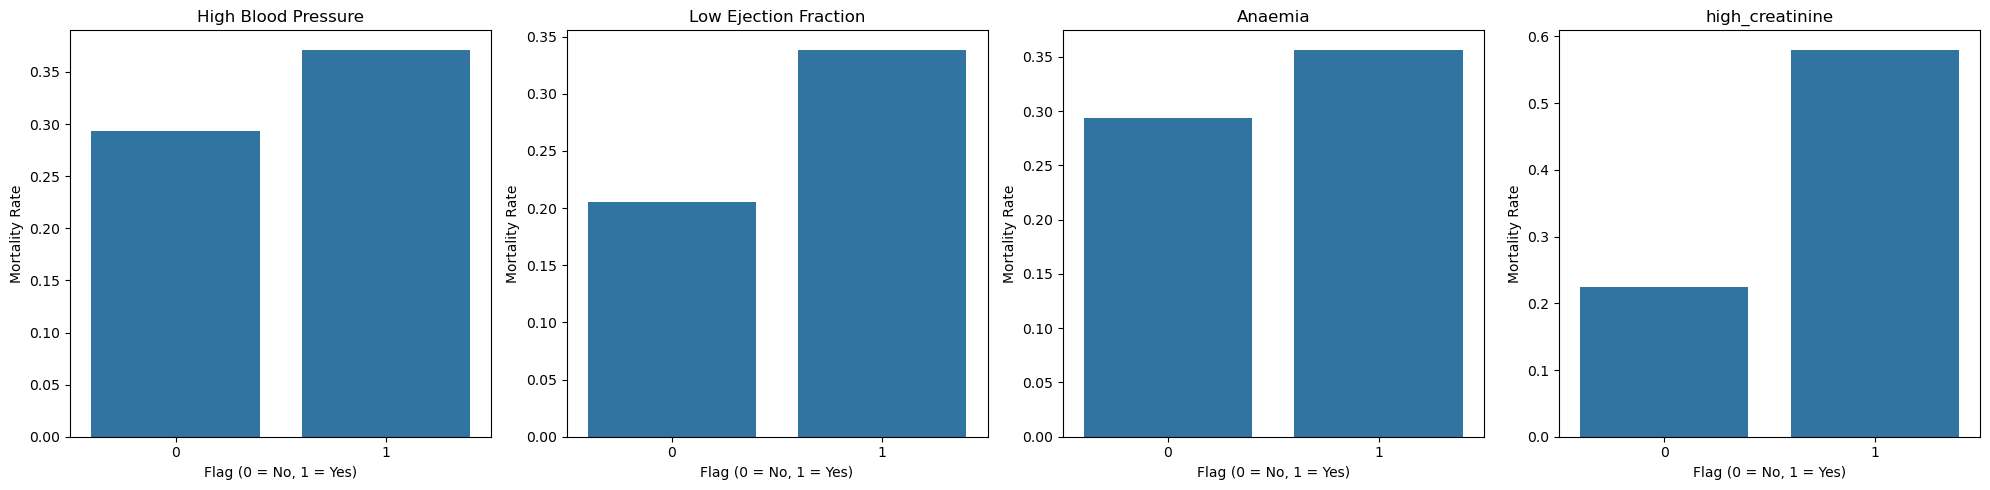

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_high_bp = pd.read_csv(r"C:\Users\hausl\Documents\SQL RESULTS\1\high_bp_mortality.csv")
df_low_ef = pd.read_csv(r"C:\Users\hausl\Documents\SQL RESULTS\1\low_ef_mortality.csv")
df_anemia = pd.read_csv(r"C:\Users\hausl\Documents\SQL RESULTS\1\anemia_mortality.csv")
df_high_creatinine = pd.read_csv(r"C:\Users\hausl\Documents\SQL RESULTS\1\high_creatinine_mortality.csv")

# Create a 1-row, 4-column figure
fig, axes = plt.subplots(1, 4, figsize=(20,5))

# Plot each dataset
sns.barplot(x='high_bp', y='mortality_rate', data=df_high_bp, ax=axes[0])
axes[0].set_title("High Blood Pressure")

sns.barplot(x='low_ef', y='mortality_rate', data=df_low_ef, ax=axes[1])
axes[1].set_title("Low Ejection Fraction")

sns.barplot(x='anaemia', y='mortality_rate', data=df_anemia, ax=axes[2])
axes[2].set_title("Anaemia")

sns.barplot(x='high_creatinine', y='mortality_rate', data=df_high_creatinine, ax=axes[3])
axes[3].set_title("high_creatinine")

# Label axes
for ax in axes:
    ax.set_xlabel("Flag (0 = No, 1 = Yes)")
    ax.set_ylabel("Mortality Rate")

plt.tight_layout()
plt.show()


*2. How does age and comorbidity burden influence risk?*

<table>
<tr>
<td><img src="C:\Users\hausl\Documents\SQL RESULTS\images\Mortality Rate By Age Category Group Chart.png"" width="400"/></td>
<td><img src="C:\Users\hausl\Documents\SQL RESULTS\images\Mortality Rate by Age Category Heat Map.png" width="400"/></td>
</tr>
</table>


**Insights:**
- Mortality increases with age, especially for patients 70+.  
- More comorbidities compound risk; younger patients with 1–2 risk factors still have relatively low mortality.  
- Age + risk factor count is a strong stratification metric

*3. Are there sex-based differences in comorbidity profiles and mortality?*

In [25]:
import pandas as pd
df_sex = pd.read_csv(r"C:\Users\hausl\Documents\SQL RESULTS\1\sex_mortality.csv", index_col=0)
df_sex

,num_patients,mortality_rate,avg_anaemia,avg_diabetes,avg_high_bp,avg_smoking,avg_risk_factors
sex,,,,,,,
male,194,0.3196,0.3969,0.3608,0.3144,0.4742,1.5464
female,105,0.3238,0.4952,0.5238,0.4190,0.0381,1.4762


**Insights:**
- Mortality is similar between sexes (~32%).  
- Comorbidity profiles differ: females have higher anaemia, diabetes, high BP; males smoke more.  
- Suggests interventions may be tailored by sex-specific risk patterns.

## Examining Comorbidities

We next explored how multiple comorbidities influence mortality. By summing flags for anemia, diabetes, high blood pressure, and smoking into a risk_factor_count, we expected that patients with more risk factors would face higher risk of death.

To investigate further, we aggregated the dataset by each comorbidity combination and calculated the corresponding mortality rates. Individual comorbidities like diabetes or smoking had minimal impact, whereas anemia and high blood pressure emerged as the strongest single predictors.

<img src="C:\Users\hausl\Documents\SQL RESULTS\images\HEATMAP_mortaility rate by comorbity and risk factor count.png" width="600">

The heatmap above illustrates mortality rates across different comorbidity combinations, where n represents the number of patients in each category and the percentages indicate mortality. We can see that as the number of risk factors increases, mortality rises correspondingly. Smoking alone shows a high mortality of 53.8%, while anemia alone is notable at 40%. Importantly, combinations of comorbidities tend to produce even higher mortality, highlighting that cumulative risk—rather than any single condition—drives heart attack outcomes.

We next examined which combinations of comorbidities tend to produce the highest mortality risk:

In [29]:
import pandas as pd
df_sex = pd.read_csv(r"C:\Users\hausl\Documents\SQL RESULTS\1\comrobidities_risk_factor_mortality.csv")
df_sex

,anaemia,diabetes,high_bp,smoking,risk_factor_count,num_patients,mortality_rate
0,1,1,1,1,4,2,0.0000
1,1,0,1,1,3,10,0.6000
2,0,1,1,1,3,9,0.5556
3,1,1,0,1,3,7,0.4286
4,1,1,1,0,3,15,0.4000
5,0,1,1,0,2,17,0.3529
6,0,0,1,1,2,9,0.3333
7,1,0,1,0,2,21,0.3333
8,0,1,0,1,2,12,0.3333
9,1,1,0,0,2,29,0.3103


In this analysis, we assess how the presence and **combination of comorbidities** influence mortality risk in heart attack patients. The key comorbidities considered are **anaemia, diabetes, high blood pressure, and smoking**, summarized as a `risk_factor_count`.

#### 1. Mortality by Number of Comorbidities

| Risk Factor Count | Mortality Rate | Notes |
|------------------|----------------|-------|
| 0 | ~37% | Surprisingly high mortality even with no comorbidities, likely influenced by age or abnormal labs. |
| 1 | 18–40% | Varies by comorbidity: smoking alone (18.8%), anaemia alone (40%). |
| 2 | 20–35% | Mortality begins to rise; combinations start to matter more than count alone. |
| 3 | 40–60% | Significant increase in risk, especially with high BP or anaemia + smoking. |
| 4 | Variable (n=2) | Small sample size; interpretation limited. |

**Insight:** Mortality generally increases with cumulative comorbidity burden, but specific combinations amplify risk beyond the simple count.

#### 2. Impact of Individual Comorbidities and Combinations

| Comorbidity Combination | Mortality Rate |
|------------------------|----------------|
| Anaemia + High BP + Smoking | ~40–60% |
| High BP + Diabetes + Smoking | ~55% |
| Anaemia alone | ~40% |
| High BP alone | ~40% |
| Smoking alone | 18–33% |

**Insight:** Certain combinations produce **non-linear effects**; relying on single comorbidities alone can underestimate patient risk.

## Investigating Correlations and Feature Importance

We then looked at trends across numeric features (i.e ejection fraction, serum creatinine) which variables most strongly correlated with mortality:

In [30]:
import pandas as pd
df_sex = pd.read_csv(r"C:\Users\hausl\Documents\SQL RESULTS\1\numeric_mortality.csv")
df_sex

,death,avg_age,avg_ef,avg_creatinine,avg_sodium,avg_platelets,avg_cpk
0,0,58.7635,40.26601,1.184877,137.216749,266657.487685,540.054187
1,1,65.2188,33.46875,1.835833,135.375000,256381.041667,670.197917


The table above summarizes average values of key numeric features for patients who survived versus those who did not:

**Observations:**

- **Age:** Non-survivors are on average ~6.5 years older, highlighting age as a strong mortality risk factor.
- **Ejection Fraction (EF):** Lower EF in non-survivors (33.5 vs 40.3) confirms reduced heart function is linked to mortality.
- **Serum Creatinine:** Higher in non-survivors (1.84 vs 1.18), indicating impaired kidney function increases risk.
- **Serum Sodium:** Slightly lower in non-survivors (135.4 vs 137.2); modest effect.
- **Platelets:** Slightly lower in non-survivors (256k vs 267k); minor effect.
- **CPK:** Elevated in non-survivors (670 vs 540), suggesting more cardiac/muscle stress or damage.

**Insight:** Age, EF, and serum creatinine are the strongest numeric predictors of mortality in this cohort. Other lab values like platelets, sodium, and CPK provide additional context but are secondary indicators.

### Creating Risk Categories

To translate our observations into actionable insights, we stratified patients into **low, medium, and high-risk groups** based on both their **number of comorbidities** (`risk_factor_count`) and **critical lab flags**:

| Risk Category | Criteria |
|---------------|---------|
| Low           | `risk_factor_count ≤ 1` AND no high-risk lab flags (`high_creatinine=0`, `low_ef=0`, `high_serum_sodium=0`) |
| Medium        | `risk_factor_count = 2` OR presence of 1 high-risk lab flag |
| High          | `risk_factor_count ≥ 3` OR 2 or more high-risk lab flags |

**Why include serum sodium?**  
Even though serum sodium showed only a modest effect on mortality, we included `high_serum_sodium` as a risk flag because it can **interact with other comorbidities and lab abnormalities**, potentially amplifying overall risk. Including it ensures we capture patients whose risk may be underestimated when looking only at comorbidities or stronger lab indicators.

This stratification allows us to **summarize mortality risk at a glance** and provides a framework for **future predictive modeling**, supporting targeted interventions for high-risk patients.

With the stratification in place, we can now visualize how mortality increases with higher risk categories. We created a bar chart showing the mortality rate for each category:

The bar chart allows us to quickly see that mortality rises substantially as patients move from low to high risk, supporting the value of this risk stratification approach for clinical triage or predictive modeling.

<img src="C:\Users\hausl\Documents\SQL RESULTS\images\Mortality BY Risk Category.png" width="600">

Key Observations:

*Low risk*: Small group, low mortality (18%). Absence of comorbidities and normal labs is protective.

*Medium risk*: Largest group, moderate mortality (27%). Even a single abnormal lab or two risk factors increases risk.

*High risk*: Clinically critical group, high mortality (47%). Multiple comorbidities or lab abnormalities dramatically increase death risk.

## Exploring Derived Ratios

Building on our insights from comorbidities and lab flags, we investigated **engineered ratios** to capture more nuanced risk patterns. Specifically, we examined:

- `creatine_to_ef_ratio`: combines creatinine and ejection fraction to highlight patients with both poor kidney function and reduced cardiac output.
- `platelets_per_risk_factor`: adjusts platelet count by the number of comorbidities, potentially identifying patients whose lab values are more concerning relative to their baseline risk.

Preliminary analysis suggests that **higher creatine-to-ejection fraction ratios and extreme platelet-per-risk-factor values** correlate with increased mortality, indicating their usefulness as additional indicators for stratifying high-risk patients.

We will first look into creatine_to_ef_ratio and platelets_per_risk_factor individually and its effect on mortality rate by breaking it up into quartiles: 

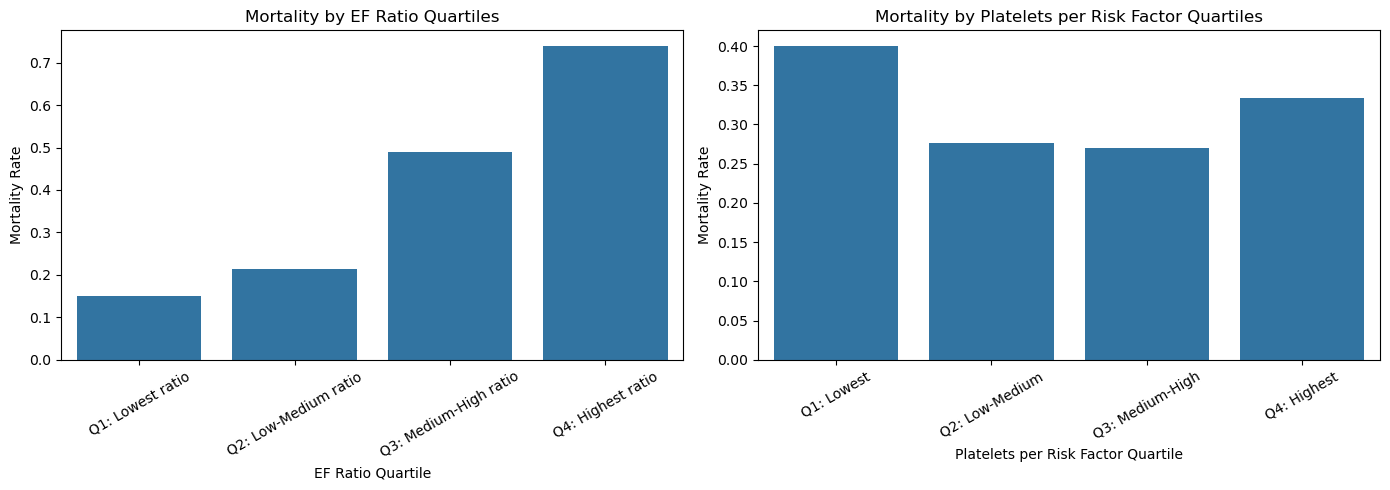

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_ef = pd.read_csv(r"C:\Users\hausl\Documents\SQL RESULTS\1\ef_ratio_mortality.csv")
df_plateletes = pd.read_csv(r"C:\Users\hausl\Documents\SQL RESULTS\1\platelets_ratio_mortality.csv")
df_ef['ratio_quartile'] = df_ef['ratio_quartile'].astype(str)
df_plateletes['ratio_quartile'] = df_plateletes['platelets_ratio_quartile'].astype(str) 


fig, axes = plt.subplots(1, 2, figsize=(14,5))

# EF Ratio mortality
sns.barplot(x='ratio_quartile', y='mortality_rate', data=df_ef, ax=axes[0])
axes[0].set_title('Mortality by EF Ratio Quartiles')
axes[0].set_xlabel('EF Ratio Quartile')
axes[0].set_ylabel('Mortality Rate')
axes[0].tick_params(axis='x', rotation=30)

# Platelets per Risk Factor mortality
sns.barplot(x='ratio_quartile', y='mortality_rate', data=df_plateletes, ax=axes[1])
axes[1].set_title('Mortality by Platelets per Risk Factor Quartiles')
axes[1].set_xlabel('Platelets per Risk Factor Quartile')
axes[1].set_ylabel('Mortality Rate')
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

**Insights:**

1. **Creatinine-to-Ejection Fraction Ratio**
   - Mortality increases sharply as the creatinine-to-ejection fraction ratio rises.
   - Patients in the fourth quartile (highest ratio) are at extremely high risk, with a 74% mortality rate.
   - This ratio effectively amplifies combined cardiac and renal risk, reflecting creatinine relative to ejection fraction.

2. **Platelets per Risk Factor**
   - Extremely low platelets per risk factor are associated with higher mortality.
   - High platelets per risk factor have a smaller effect on mortality.
   - This suggests that low platelet counts relative to a patient’s risk burden may indicate poor prognosis.

Next, we explored how combining these two features could impact overall mortality. We created a **Combined Risk Score** by adding the `creatinine_to_ef_ratio` and `platelets_per_risk_factor`, assigning points based on quartiles of each metric. The resulting composite score ranges from 0 to 4.  

<details>
<summary>Click to see how the Combined Risk Score was derived</summary>
    
### Combined Risk Score: Explanation

#### Step 1: Assign Quartiles to Each Feature
- **Creatinine-to-Ejection Fraction Ratio (`creatine_to_ef_ratio`)**  
  - Q1: Lowest CPK/EF  
  - Q2: Low-Medium CPK/EF  
  - Q3: Medium-High CPK/EF  
  - Q4: Highest CPK/EF  

- **Platelets per Risk Factor (`platelets_per_risk_factor`)**  
  - Q1: Lowest platelets per risk factor  
  - Q2: Low-Medium platelets per risk factor  
  - Q3: Medium-High platelets per risk factor  
  - Q4: Highest platelets per risk factor  

> Quartiles are assigned using `NTILE(4)` to split patients evenly into four groups per feature.

---

#### Step 2: Assign Points for Risk Score
| Feature | Quartile | Points |
|---------|----------|--------|
| `creatine_to_ef_ratio` | Q1 → Q4 | 0 → 3 (higher ratio = higher risk) |
| `platelets_per_risk_factor` | Q1 → Q4 | 3 → 0 (lower platelets = higher risk) |

---
#### Step 3: Calculate Combined Risk Score

The **total risk score** is calculated as:

$$
\text{Total Risk Score} = (\text{CPK/EF Quartile} - 1) + (4 - \text{Platelets Quartile})
$$

### Reasoning Behind the Adjustments:

1. **CPK/EF Quartile - 1**  
   - Quartiles for `creatine_to_ef_ratio` go from 1 (lowest) → 4 (highest).  
   - A higher ratio indicates **higher risk**, so we subtract 1 to make the **lowest quartile = 0 points** and the **highest quartile = 3 points**.  
   - This ensures the score increases with risk in a linear, intuitive way.

2. **4 - Platelets Quartile**  
   - Quartiles for `platelets_per_risk_factor` also go from 1 (lowest) → 4 (highest).  
   - Here, **lower platelets indicate higher risk** as they may reflect a greater number of comorbidities associated with poor prognosis.  
- To align the scoring with risk direction, we invert the quartile by subtracting it from 4:    
   - This makes the **lowest platelets quartile = 3 points** and the **highest = 0 points**, aligning with risk direction.

### Combined Effect
- Adding the two adjusted quartile points gives a **total risk score** where higher values reflect **higher combined cardiac and hematologic risk**.
- **Range:** 0 (lowest risk) → 4 (highest risk)

To show the relationship between **Combined Risk Score** and **mortality**, we created a **bubble chart**.

### Chart Design:

- **X-axis:** Creatinine-to-Ejection Fraction quartile (CPK/EF)  
- **Y-axis:** Platelets per Risk Factor quartile  
- **Bubble size:** Mortality rate  
  - Larger bubbles indicate higher mortality  
- **Bubble color:** Total risk score  
  - Darker or more intense colors represent higher combined risk  

### Why We Chose a Bubble Chart:

- It allows **simultaneous visualization of three dimensions**: risk score, mortality, and patient distribution.  
- Helps identify patterns that would be harder to see in a table or a simple scatter plot.  
- Color and size make it **intuitive to spot high-risk groups** at a glance.  

> The chart effectively communicates how the combination of low platelets and high creatinine-to-EF ratio drives mortality risk, highlighting the most vulnerable patient groups.

<img src="C:\Users\hausl\Documents\SQL RESULTS\images\High_Risk Patients Mortality Rate vs Total Risk Score.png" width="800">

**Insight:**  
- The bubble chart confirms that **patients with both high creatinine-to-EF ratios and low platelets are extremely high-risk**, while higher platelets per risk can somewhat mitigate risk in moderate CPK/EF quartiles.  
- This combined score effectively identifies **high-priority patients for monitoring or intervention**.

## STAKEHOLDER SUMMARY: KEY FINDINGS

#### 1. Age as a Strong Predictor
- **Observation:** Mortality increases significantly with patient age.  
- **Action:** Prioritize older patients for early intervention, routine cardiac monitoring, and aggressive management of comorbidities.

#### 2. Risk Factor Count / Comorbidities
- **Observation:** Patients with multiple risk factors (comorbidities) have substantially higher mortality, even though some individual factors (e.g., anemia) are strong on their own.  
- **Action:** Implement comprehensive care plans for patients with 2+ comorbidities. Early screening and preventive strategies can reduce progression to higher-risk status.

#### 3. Risk Category by Abnormalities
- **Observation:** Patients classified into higher-risk categories based on abnormal lab values or vitals show markedly higher mortality.  
- **Action:** For lower-risk groups, implement **preventive monitoring**, lifestyle counseling, and early interventions to prevent escalation.

#### 4. Creatinine-to-EF Ratio and Platelets per Risk Factor
- **Observation:** High creatinine-to-EF ratios and low platelets per risk factor identify patients at extreme risk.  
- **Action:** Closely monitor these patients; consider prioritizing for **intensive care, cardiology consults, or additional diagnostic testing**.

#### 5. Summary Table: KPI and Actions

| Predictor / Feature | Risk Insight | Actionable Steps |
|--------------------|-------------|----------------|
| Age | Higher age → higher mortality | Prioritize older patients for monitoring and early interventions |
| Risk Factor Count | ≥2 comorbidities → much higher risk | Comprehensive care plans, proactive screening |
| Abnormalities Risk Category | Higher category → higher mortality | Preventive measures for lower-risk patients, early interventions |
| Creatinine-to-EF Ratio | High values → extreme risk | Continuous monitoring, cardiology consults |
| Platelets per Risk Factor | Low values → extreme risk | Monitor trends, manage underlying comorbidities |

**Overall Takeaway:**  
- **Prioritize high-risk patients** based on age, comorbidity count, lab abnormalities, and combined risk scores.  
- **Prevent progression** in lower-risk groups through early monitoring, preventive interventions, and proactive management.

### SMART QUESTIONS INSIGHTS: 

#### 1. Which clinical features are most strongly associated with heart attack mortality?
- **Age**: Mortality increases significantly with age, making it the strongest demographic predictor.  
- **Creatinine-to-EF Ratio**: High values indicate combined cardiac and renal risk and correlate strongly with mortality.  
- **Platelets per Risk Factor**: Low platelet counts relative to risk burden are associated with higher mortality.  
- **Comorbidities**: Multiple comorbidities amplify risk; even individually strong predictors like anemia contribute significantly.

---

#### 2. Do patients with comorbidities (diabetes, anemia, high blood pressure) have higher mortality risk?
- **Yes.**  
- Patients with **2 or more comorbidities** have markedly higher mortality than those with a single or no comorbidity.  
- Certain comorbidities like **anemia** are strong independent predictors, but risk **escalates synergistically** when multiple comorbidities are present.

---

#### 3. How does smoking impact mortality risk?
- **Smoking is associated with increased risk**, though its impact is smaller relative to age, comorbidities, and key lab features like creatinine-to-EF ratio.  
- It may act as a **moderating factor**, increasing risk in combination with other predictors.

---

#### 4. Can we create a predictive risk score to stratify patients into low, medium, and high-risk groups?
- **Yes.**  
- Using **Combined Risk Score** based on quartiles of `creatinine-to-EF ratio` and `platelets per risk factor`, patients can be stratified:  

| Risk Category | Score Range | Mortality Insight |
|---------------|------------|-----------------|
| Low Risk      | 0–1        | 9–21%           |
| Medium Risk   | 2–3        | 11–56%          |
| High Risk     | 4–6        | 53–86%          |

- This scoring system provides **triage guidance and resource prioritization** for clinical care.

---

#### 5. Which features should clinicians monitor most closely to prevent heart attacks?
- **Age and comorbidity count** – prioritize older patients and those with multiple comorbidities.  
- **Creatinine-to-EF ratio** – indicates combined cardiac/renal risk.  
- **Platelets per risk factor** – low counts signal poor prognosis.  
- **Lab abnormalities and risk category** – higher-risk categories need proactive monitoring to prevent escalation.  
- **Lifestyle factors like smoking** – manage as part of preventive care.

**Overall Recommendation:**  
- Focus on high-impact features (age, creatinine-to-EF ratio, platelet count, comorbidities) for **early intervention, monitoring, and preventive strategies**.  
- Use the **Combined Risk Score Bubble Chart** to triage patients and allocate clinical resources effectively.

## Opportunities for Enhancement
- Could incorporate additional lifestyle factors (e.g., diet, exercise) if available.  
- Consider validating the Combined Risk Score against an independent cohort for predictive robustness.  
- Could include a predictive model (logistic regression or machine learning) for formal risk scoring, complementing descriptive statistics.
